# Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("Ïäù=3")

Ïäù=3


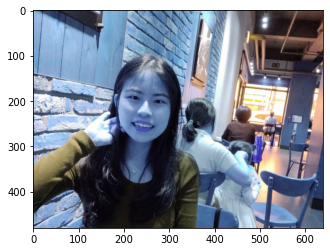

In [2]:
import os
my_image_path=os.getenv('HOME')+'/aiffel/camera_sticker/images/yejin.jpg'
img_bgr=cv2.imread(my_image_path)
img_bgr=cv2.resize(img_bgr, (640,480))
img_show=img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

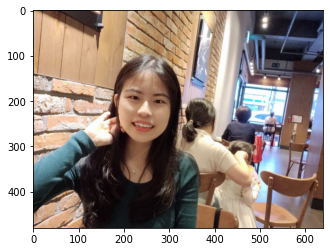

In [3]:
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# ÏñºÍµ¥ Í≤ÄÏ∂ú & ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂ú ÌïòÍ∏∞

In [4]:
import dlib
detector_hog=dlib.get_frontal_face_detector() #detector ÏÑ†Ïñ∏
print("Ïäù=3")

Ïäù=3


In [5]:
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects=detector_hog(img_rgb, 1)
print("Ïäù=3")

Ïäù=3


rectangles[[(182, 168) (311, 297)]]


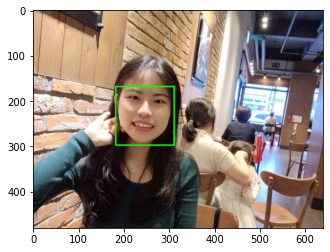

In [6]:
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [8]:
list_landmarks=[]
for dlib_rect in dlib_rects:
    points=landmark_predictor(img_rgb,dlib_rect)
    list_points=list(map(lambda p:(p.x, p.y),points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


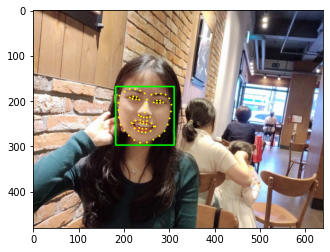

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show,point,2,(0,255,255),-1)
        
img_show_rgb=cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÏúÑÏπò ÌôïÏù∏ÌïòÍ∏∞

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x=landmark[30][0]
    y=landmark[30][1]
    w=dlib_rect.width()
    h=dlib_rect.height()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(246, 225)
(x,y):(246,225)
(w,h):(130,130)


In [11]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


In [12]:
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (181,160)


# Ïä§Ìã∞Ïª§ ÌöåÏ†ÑÌïòÍ∏∞

In [13]:
import math
tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi
print(rotate_angle)

-10.124671655397817


(130, 130, 3)


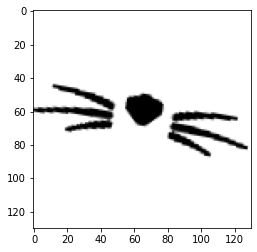

In [14]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result

img_rotate = rotate_image(img_sticker,rotate_angle)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

# Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞

In [15]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_rotate.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)

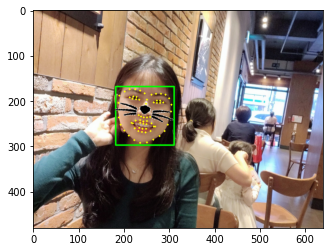

In [16]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# Ïä§Ìã∞Ïª§ Ìà¨Î™ÖÎèÑ Ï°∞Ï†àÌï¥ÏÑú ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©

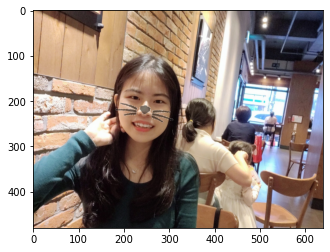

In [274]:
sticker_area = img_bgr[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]
img_bgr[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# ÌöåÍ≥†

## - Ïä§Ìã∞Ïª§Îäî ÏΩîÏùò ÏúÑÏπòÎ•º Ï∞∏Ï°∞Ìï¥ÏÑú ÏÑ§Ï†ïÌñàÎã§. ÌïòÏßÄÎßå Í∑∏ Îã§ÏùåÏóê Ïä§Ìã∞Ïª§ ÌöåÏ†ÑÍ≥º Ìà¨Î™ÖÎèÑ Ï°∞Ï†àÌïòÎäî Ï†êÏù¥ Ïñ¥Î†§Ïõ†Îã§.

## - Ïä§Ìã∞Ïª§ ÌöåÏ†ÑÏùÄ ÏΩßÎì±Ïù∏ 27Î≤à Ï†êÍ≥º ÏúÑÏπò ÏÑ§Ï†ïÌï† Îïå ÏÇ¨Ïö©ÌïòÎçò 30Î≤à Ï†êÏùò Í∞ÅÎèÑÎ•º Ïù¥Ïö©ÌïòÏó¨ Ï°∞Ï†àÌïòÏòÄÎã§. ÎòêÌïú, Ìà¨Î™ÖÎèÑÎäî 50%Î°ú Î∞îÍø®Îã§. 

## - ÌïòÎÇòÏùò ÏÇ¨ÏßÑÏù¥ ÏïÑÎãå Ïó¨Îü¨Í∞ÄÏßÄ ÏÇ¨ÏßÑÎì§ÏùÑ Ï†ÅÏö©Ìï¥ÏÑú Ïä§Ìã∞Ïª§Í∞Ä Ïûò Î∂ôÎäîÏßÄ ÌôïÏù∏ÌñàÎã§.

<img src='image1.JPG'>

## - ÏΩîÏóê Í∑∏Î¶ºÏûêÍ∞Ä Ï†∏ÏÑú Í∑∏Îü∞ÏßÄ Í∞ÅÎèÑÎ•º Ï°∞Í∏à Ïù¥ÏÉÅÌïòÍ≤å Ïû°ÏïòÎã§.

<img src='image2.JPG'>

## - Ï°∞Î™ÖÏùÑ Ïñ¥Îë°Í≤å ÌñàÎäîÎç∞ÎèÑ Ïä§Ìã∞Ïª§Í∞Ä Ïûò Î∂ôÎäîÎã§. Í∞ÅÎèÑÍ∞Ä Ïù¥ÏÉÅÌïòÍ≤å Îêú Í≤ÉÏùÄ ÏïÑÏâΩÎã§.

<img src='image3.JPG'>

## - Î©ÄÎ¶¨ÏÑú Ï∞çÏóàÎäîÎç∞ Ïä§Ìã∞Ïª§Í∞Ä Ïûò Î∂ôÎäîÎã§.

<img src='image4.JPG'>

## - Í∞ÅÎèÑÎ•º Îã¨Î¶¨ÌñàÎäîÎç∞ Ïä§Ìã∞Ïª§Í∞Ä Ïûò Î∂ôÎäîÎã§.

## - Ï°∞Î™ÖÍ≥º Í∞ÅÎèÑÏôÄ Ïπ¥Î©îÎùº Í±∞Î¶¨Î•º Îã¨Î¶¨Ìï¥ÎèÑ Ïä§Ìã∞Ïª§Í∞Ä Îã§ Ïûò ÏÉùÍ∏¥Îã§Îäî Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§. ÏΩîÏóê Í∑∏Î¶ºÏûêÍ∞Ä ÏßÄÎ©¥ Ïä§Ìã∞Ïª§Ïùò Í∞ÅÎèÑÍ∞Ä Ïù¥ÏÉÅÌïòÍ≤å Ïû°ÌòÄÏÑú Îã§Î•∏ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº Îê† Í≤É Í∞ôÎã§. 